In [409]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

In [410]:
# Load the dataset as a pandas DataFrame
chr_analytic_csv_path = Path.cwd().parent / "data" / "chr_analytic_data2022.csv"
chr_analytic_df = pd.read_csv(chr_analytic_csv_path, skiprows=1)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,0.507545,167227921,329484123,NaN,NaN,0.192690,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,0.517027,2544566,4921532,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,0.515077,28919,56145,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,0.515891,118287,229287,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,0.471837,11602,24589,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,0.483608,20637,42673,NaN,NaN,0.109163,4782.0,43806.0,NaN,NaN
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,0.481338,11310,23497,NaN,NaN,0.464309,9887.0,21294.0,NaN,NaN
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,0.493940,9985,20215,NaN,NaN,0.430959,9101.0,21118.0,NaN,NaN
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,0.490464,3806,7760,NaN,NaN,0.359545,3068.0,8533.0,NaN,NaN


In [411]:
# Remove columns with more than 50% nan
chr_analytic_df.dropna(axis = 1, thresh = int(0.6 * len(chr_analytic_df)), inplace=True)
chr_analytic_df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v059_numerator,v059_denominator,v059_cilow,v059_cihigh,v057_rawvalue,v057_numerator,v057_denominator,v058_rawvalue,v058_numerator,v058_denominator
0,0,0,0,US,United States,2022,NaN,7281.935564,4125218.0,917267406.0,...,12766829,306919116,0.041357,0.041836,0.507545,167227921,329484123,0.192690,NaN,NaN
1,1,0,1000,AL,Alabama,2022,NaN,10350.071456,88086.0,13668498.0,...,46887,4599254,0.009667,0.010722,0.517027,2544566,4921532,0.409632,1957932.0,4779736.0
2,1,1,1001,AL,Autauga County,2022,1.0,8027.394727,836.0,156081.0,...,363,52404,0.001701,0.012153,0.515077,28919,56145,0.420022,22921.0,54571.0
3,1,3,1003,AL,Baldwin County,2022,1.0,8118.358206,3377.0,614143.0,...,1593,206329,0.004913,0.010529,0.515891,118287,229287,0.422791,77060.0,182265.0
4,1,5,1005,AL,Barbour County,2022,1.0,12876.760319,539.0,68126.0,...,433,23694,0.007950,0.028599,0.471837,11602,24589,0.677896,18613.0,27457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599.0,122399.0,...,321,40482,0.002901,0.012958,0.483608,20637,42673,0.109163,4782.0,43806.0
3190,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111.0,66036.0,...,668,22310,0.014451,0.045433,0.481338,11310,23497,0.464309,9887.0,21294.0
3191,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287.0,57690.0,...,237,18910,0.001921,0.023145,0.493940,9985,20215,0.430959,9101.0,21118.0
3192,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115.0,21075.0,...,16,7491,0.000000,0.012753,0.490464,3806,7760,0.359545,3068.0,8533.0


In [412]:
# Get dataframe without categorical data
numeric_chr_analytic_df = chr_analytic_df.drop(["state", "county"], axis=1)
numeric_chr_analytic_df.dropna(axis='columns', inplace=True)
numeric_chr_analytic_df.drop(["statecode", "countycode", "fipscode", "v001_flag", "year"], axis = 1, inplace=True)

numeric_chr_analytic_df.interpolate(inplace=True)
# Replace remaining NaN with median of column
#imputer = SimpleImputer(missing_values=np.nan, strategy="median")
#imputer = imputer.fit(numeric_chr_analytic_df)
#numeric_chr_analytic_df = imputer.transform(numeric_chr_analytic_df)

numeric_chr_analytic_df

,year,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_flag,v009_rawvalue,v011_rawvalue,v133_denominator,v070_rawvalue,v049_rawvalue,...,v056_denominator,v126_rawvalue,v126_numerator,v126_denominator,v059_rawvalue,v059_numerator,v059_denominator,v057_rawvalue,v057_numerator,v057_denominator
0,2022,0.171052,3.907359,4.526981,0,0.164926,0.321,0.109,0.259,0.197875,...,329484123,0.597217,196773390,329484123,0.041597,12766829,306919116,0.507545,167227921,329484123
1,2022,0.214102,4.814633,5.618316,0,0.210927,0.363,0.161,0.308,0.147992,...,4921532,0.651378,3205777,4921532,0.010194,46887,4599254,0.517027,2544566,4921532
2,2022,0.201000,4.510042,5.419068,0,0.197000,0.353,0.157,0.322,0.161612,...,56145,0.731659,41079,56145,0.006927,363,52404,0.515077,28919,56145
3,2022,0.172000,4.168866,5.173915,0,0.199000,0.296,0.134,0.276,0.215035,...,229287,0.833083,191015,229287,0.007721,1593,206329,0.515891,118287,229287
4,2022,0.311000,5.884415,6.109899,0,0.278000,0.404,0.207,0.416,0.139276,...,24589,0.452641,11130,24589,0.018275,433,23694,0.471837,11602,24589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2022,0.163000,3.495993,3.933550,0,0.170000,0.335,0.113,0.252,0.176325,...,42673,0.791953,33795,42673,0.007929,321,40482,0.483608,20637,42673
3190,2022,0.116000,2.779692,3.305173,0,0.113000,0.222,0.090,0.185,0.193689,...,23497,0.810146,19036,23497,0.029942,668,22310,0.481338,11310,23497
3191,2022,0.172000,3.792121,4.268578,0,0.188000,0.298,0.126,0.278,0.181873,...,20215,0.868068,17548,20215,0.012533,237,18910,0.493940,9985,20215
3192,2022,0.173000,3.660729,4.040619,0,0.176000,0.289,0.116,0.259,0.190701,...,7760,0.824742,6400,7760,0.002136,16,7491,0.490464,3806,7760


In [413]:
# Generate a mapping that converts variable names to their descriptions
VAR_DESCRIPTION_MAPPING = dict((k, v) for (v, k) in pd.read_csv(chr_analytic_csv_path, nrows=1).iloc[0].items())


In [414]:
# Find correlation between columns
corr = numeric_chr_analytic_df.corr(method="pearson", numeric_only=True)
corr

,year,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_flag,v009_rawvalue,v011_rawvalue,v133_denominator,v070_rawvalue,v049_rawvalue,...,v056_denominator,v126_rawvalue,v126_numerator,v126_denominator,v059_rawvalue,v059_numerator,v059_denominator,v057_rawvalue,v057_numerator,v057_denominator
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v002_rawvalue,NaN,1.000000,0.902704,0.729709,-0.063752,0.687013,0.701495,0.795108,0.857139,-0.677181,...,-0.026969,-0.503492,-0.029787,-0.026969,0.239881,-0.021188,-0.027008,-0.046420,-0.026954,-0.026969
v036_rawvalue,NaN,0.902704,1.000000,0.913989,-0.105350,0.824458,0.613841,0.799719,0.754954,-0.658834,...,-0.029089,-0.228754,-0.028666,-0.029089,-0.001147,-0.030462,-0.029068,0.011894,-0.029057,-0.029089
v042_rawvalue,NaN,0.729709,0.913989,1.000000,-0.150369,0.829636,0.544666,0.729149,0.640896,-0.575777,...,-0.030150,0.003893,-0.026511,-0.030150,-0.226350,-0.040275,-0.030091,0.135060,-0.030071,-0.030150
v037_flag,NaN,-0.063752,-0.105350,-0.150369,1.000000,-0.057406,-0.008732,-0.060364,-0.000584,0.082000,...,-0.012499,0.062863,-0.012519,-0.012499,-0.014311,-0.012091,-0.012496,-0.100400,-0.012506,-0.012499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v059_numerator,NaN,-0.021188,-0.030462,-0.040275,-0.012091,-0.064428,-0.057207,-0.026355,-0.036062,0.002885,...,0.983073,-0.060114,0.969841,0.983073,0.083958,1.000000,0.983116,0.018712,0.982911,0.983073
v059_denominator,NaN,-0.027008,-0.029068,-0.030091,-0.012496,-0.050170,-0.046078,-0.024810,-0.036439,0.005768,...,0.999994,-0.040107,0.997907,0.999994,0.048881,0.983116,1.000000,0.019790,0.999994,0.999994
v057_rawvalue,NaN,-0.046420,0.011894,0.135060,-0.100400,-0.012665,-0.001972,0.044402,0.012591,-0.128906,...,0.019752,0.010337,0.019408,0.019752,-0.115593,0.018712,0.019790,1.000000,0.020038,0.019752
v057_numerator,NaN,-0.026954,-0.029057,-0.030071,-0.012506,-0.050181,-0.045986,-0.024736,-0.036386,0.005651,...,0.999998,-0.040252,0.997945,0.999998,0.048889,0.982911,0.999994,0.020038,1.000000,0.999998


<AxesSubplot: >

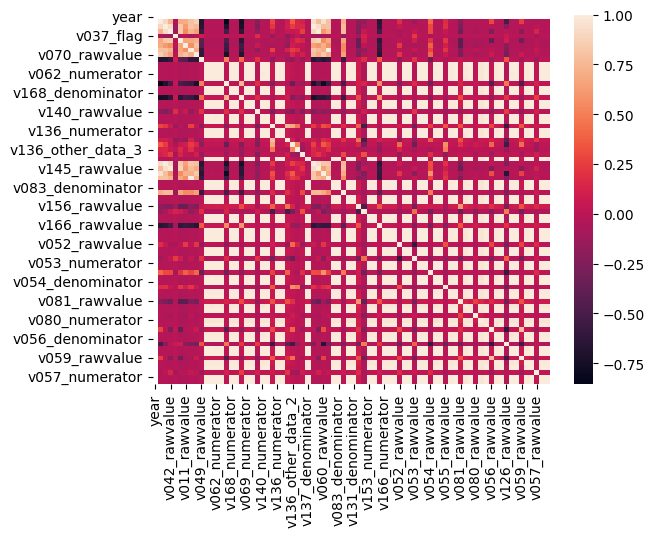

In [415]:
sns.heatmap(corr)


In [416]:
# Create a series containing absolute value of correlations of rows to v005_rawvalue (Preventable hospital stays raw value)
absolute_correlations = abs(corr["v005_rawvalue"])

# Remove rows with labels that contain v005, as these are also preventable hospital stays
for label, value in absolute_correlations.items():
    if "v005" in label:
        absolute_correlations.drop(label, inplace = True)

# Get the ten rows with the most correlation
N_most_correlated = 10
most_correlated = absolute_correlations.nlargest(N_most_correlated)
print(f"{N_most_correlated} variables most correlated with {VAR_DESCRIPTION_MAPPING['v005_rawvalue']}")
for label, value in most_correlated.items():
    print(label.ljust(20), VAR_DESCRIPTION_MAPPING[label].ljust(50), corr.loc["v005_rawvalue", label])
    scatter_plot = sns.regplot(x=chr_analytic_df[label], y=chr_analytic_df["v005_rawvalue"], line_kws = {"color":"red"})
    scatter_plot.set_xlabel(VAR_DESCRIPTION_MAPPING[label])
    scatter_plot.set_ylabel(VAR_DESCRIPTION_MAPPING["v005_rawvalue"])
    scatter_plot.set_title(string.capwords(f"{VAR_DESCRIPTION_MAPPING['v005_rawvalue']} versus {VAR_DESCRIPTION_MAPPING[label]}"))


    df = chr_analytic_df[ [label, "v005_rawvalue"] ].copy()
    df = df.dropna()
    a, b = np.polyfit(df[label], df["v005_rawvalue"], 1)
    
    plt.text(0.5, -0.25, f"y = {a:.1f}*x + {b:.1f} \n r = {corr.loc['v005_rawvalue', label]:.4f}", verticalalignment="bottom", horizontalalignment='center', transform=scatter_plot.transAxes, size='medium', color='black', weight='semibold')
    plt.show()
    plt.figure()

KeyError: 'v005_rawvalue'